****
# Metrics for Classification Models in Machine Learning
****
<p style="text-align:right"><i>Jesus Perez Colino<br>First version: November 2016</i></p>

## About this notebook: 
****
Notebook prepared by **Jesus Perez Colino** Version 0.2, First Released: 01/10/2016, Alpha

- This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). This work is offered for free, with the hope that it will be useful.


- **Summary**: This Jupyter notebook is an exercise about how to use metrics for a classification problem solved using SVM

In [61]:
import IPython
import numpy as np
from sys import version 
import seaborn as sns
from sklearn import __version__
print (' Reproducibility conditions for this notebook '.center(85,'-'))
print ('Python version:       ' + version)
print ('Scikit-learn version: ' + __version__)
print ('Numpy version:        ' + np.__version__)
print ('IPython version:      ' + IPython.__version__)
print ('-'*85)

-------------------- Reproducibility conditions for this notebook -------------------
Python version:       3.5.3 |Anaconda 4.4.0 (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Scikit-learn version: 0.18.1
Numpy version:        1.12.1
IPython version:      5.3.0
-------------------------------------------------------------------------------------


In [26]:
#Let's load data of a tipical example of a dataset with imbalanced classes

from sklearn.datasets import load_digits
digits = load_digits()
print('digits.target: \n', digits.target, len(digits.target))
print('digits.target: \n', digits.data, len(digits.data),len(digits.data[0]) )

digits.target: 
 [0 1 2 ..., 8 9 8] 1797
digits.target: 
 [[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]] 1797 64


In [27]:
#Let us split the sample for train and test porpouses

y = digits.target==9
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

# R-Score for each of the three models

In [28]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [29]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.98


In [31]:
# or more elegantly, given a set of models... 

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

models = {"Most frequent class model:" : "dummy_majority.score(X_test, y_test)",
          "Decision tree model:": "tree.score(X_test, y_test)",
          "Logistic Regression model: ": "logreg.score(X_test, y_test)"}

for model in models.keys():
    print(model, 'SCORE ', eval(models[model]).round(2))


Most frequent class model: SCORE  0.9
Decision tree model: SCORE  0.92
Logistic Regression model:  SCORE  0.98


# Confusion Matrix over the prediction

In [32]:
# Confusion Matrix over the PREDICTION of three previous models: 

from sklearn.metrics import confusion_matrix

models = {"Most frequent class:" : 'dummy_majority.predict(X_test)',
          "Decision tree:": 'tree.predict(X_test)',
          "Logistic Regression": 'logreg.predict(X_test)'}

for model in models.keys():
    print(model, '\n', confusion_matrix(y_test, eval(models[model])))


Logistic Regression 
 [[401   2]
 [  8  39]]
Most frequent class: 
 [[403   0]
 [ 47   0]]
Decision tree: 
 [[390  13]
 [ 24  23]]


# f1_score over prediction

In [33]:
# f1_score for the three previous models

from sklearn.metrics import f1_score

models = {"Most frequent class:" : 'dummy_majority.predict(X_test)',
          "Decision tree:": 'tree.predict(X_test)',
          "Logistic Regression": 'logreg.predict(X_test)'}

for model in models.keys():
    print(model, ' f1_score \t', f1_score(y_test, eval(models[model])).round(2))



Logistic Regression  f1_score 	 0.89
Most frequent class:  f1_score 	 0.0
Decision tree:  f1_score 	 0.55


//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Classification Report over prediction

In [34]:
from sklearn.metrics import classification_report

models = {"Most frequent class:" : 'dummy_majority.predict(X_test)',
          "Decision tree:": 'tree.predict(X_test)',
          "Logistic Regression: ": 'logreg.predict(X_test)'}

for model in models.keys():
    print('CLASSIFICATION REPORT for {}'.format(model), '\n\n',
          classification_report(y_test, 
                                eval(models[model]),
                                target_names = ["not nine", 'nine']))

CLASSIFICATION REPORT for Logistic Regression:  

              precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450

CLASSIFICATION REPORT for Most frequent class: 

              precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450

CLASSIFICATION REPORT for Decision tree: 

              precision    recall  f1-score   support

   not nine       0.94      0.97      0.95       403
       nine       0.64      0.49      0.55        47

avg / total       0.91      0.92      0.91       450



//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Modifing threshold of the decision function to modify accuracy/recall

In [35]:
import numbers
import numpy as np
from sklearn.utils import check_array, check_random_state
from sklearn.utils import shuffle as shuffle_

def make_blobs_2(n_samples=100, n_features=2, centers=2, cluster_std=1.0,
                 center_box=(-10.0, 10.0), shuffle=True, random_state=None):
    generator = check_random_state(random_state)
    if isinstance(centers, numbers.Integral):
        centers = generator.uniform(center_box[0], center_box[1],
                                    size=(centers, n_features))
    else:
        centers = check_array(centers)
        n_features = centers.shape[1]

    if isinstance(cluster_std, numbers.Real):
        cluster_std = np.ones(len(centers)) * cluster_std

    X = []
    y = []
    n_centers = centers.shape[0]
    if isinstance(n_samples, numbers.Integral):
        n_samples_per_center = [int(n_samples // n_centers)] * n_centers
        for i in range(n_samples % n_centers):
            n_samples_per_center[i] += 1
    else:
        n_samples_per_center = n_samples

    for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std)):
        X.append(centers[i] + generator.normal(scale=std,
                                               size=(n, n_features)))
        y += [i] * n

    X = np.concatenate(X)
    y = np.array(y)
    if shuffle:
        X, y = shuffle_(X, y, random_state=generator)
    return X, y

In [36]:

from sklearn.svm import SVC

X, y = make_blobs_2(n_samples=(400, 50), 
                    centers=2, 
                    cluster_std=[7.0, 2], 
                   random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)


In [37]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [38]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [39]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



# Precision-Recall Curve

In [40]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, 
                                                       svc.decision_function(X_test))

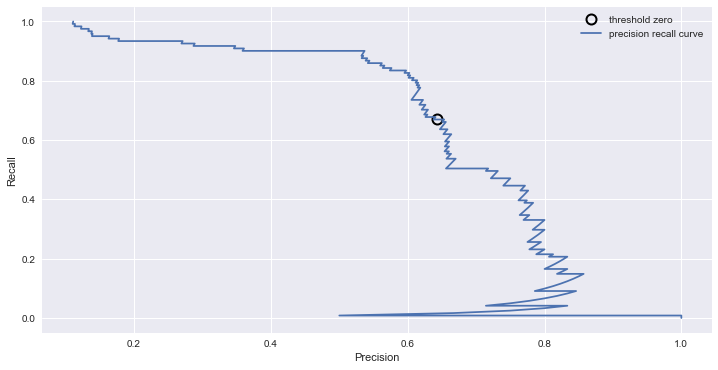

In [41]:
# create a similar dataset as before, but with more samples
# to get a smoother curve

%matplotlib inline
import matplotlib.pyplot as plt
X, y = make_blobs_2(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

# here we get the numbers

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

# find threshold closest to zero

close_zero = np.argmin(np.abs(thresholds))

# and plotting... 
fig = plt.figure(figsize=(12,6))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

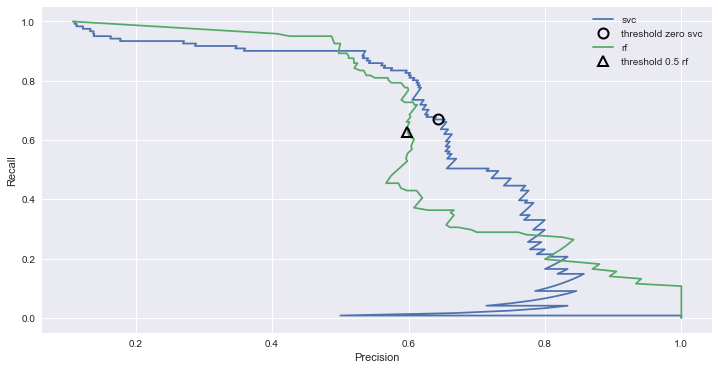

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, 
                                                                rf.predict_proba(X_test)[:, 1])

# and plotting...
fig = plt.figure(figsize=(12,6))
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [43]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [44]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.666
Average precision of svc: 0.663


# ROC (Receiver Operating Curve) 

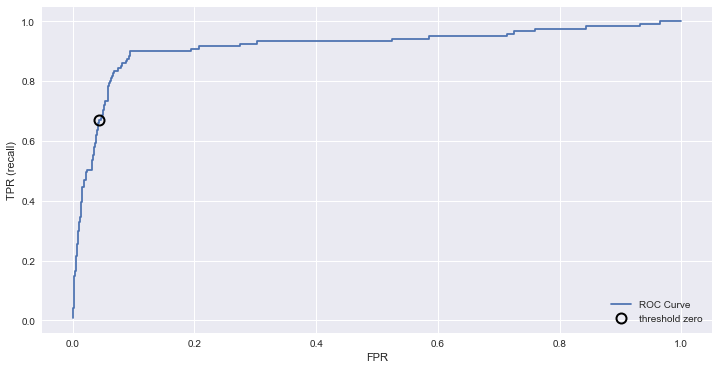

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
fig = plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

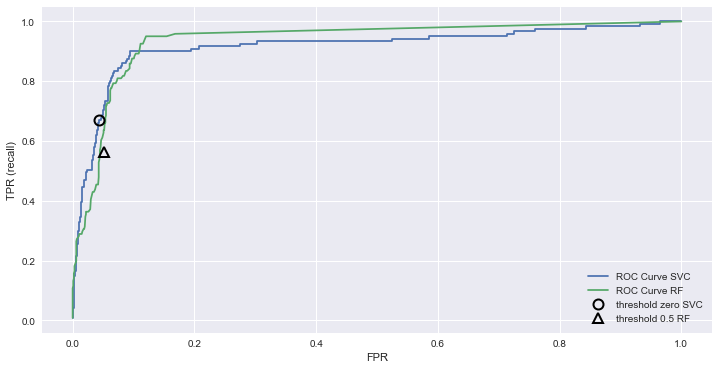

In [46]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fig = plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4);